driving counter-clockwise can help the model generalize   
flipping the images is a quick way to augment the data   
collecting data from the second track can also help generalize the model   
Steering: -1 and 1   
Throttle: 0 and 1   
Break: 0   
Speed: 0 to 30   
160 by 320   

Cut the top portion

Preprocessing: normalizing the original image with a lambda   
correction factor of 0.2 add it to the left image and subtract from right image

crop top 70 and bottom 25   
Cropping 2D layer

In [13]:
import os
import csv

samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

In [124]:
train_samples[0]

['IMG/center_2016_12_01_13_37_50_988.jpg',
 ' IMG/left_2016_12_01_13_37_50_988.jpg',
 ' IMG/right_2016_12_01_13_37_50_988.jpg',
 ' 0',
 ' 0.9855326',
 ' 0',
 ' 30.18664']

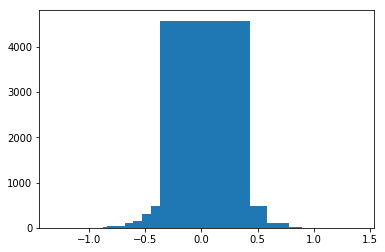

In [161]:
steer = []
for i in range(1,len(samples)-1):
    steer += [float(samples[i][3])+0*np.random.normal()]
hist = np.histogram(steer, bins = 50)
figsize=(15,15)
plt.bar(hist[1][1:],hist[0])
plt.show()

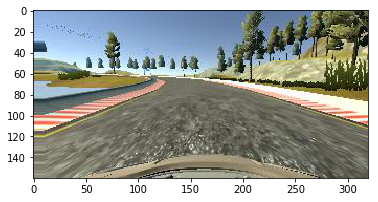

In [233]:
import scipy.ndimage
img = scipy.ndimage.interpolation.shift(image,[0,10,0], mode = 'nearest')
plt.imshow(img[...,::-1])
plt.show()

In [209]:
def random_modif(img, ang):
    
    image, angle = img, ang
    
    # Random flipping
    if (np.random.uniform()<0.5):
        image = cv2.flip(image,1)
        angle = angle*-1.0
                
    # Random brightness
    factor = np.random.uniform(0.5, 1.2)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * factor
    image = np.minimum(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB),255),0)
    
    # Angle smoothing
    angle = ang * (1.0 + np.random.uniform(-1, 1)/30.0)

    return image, angle

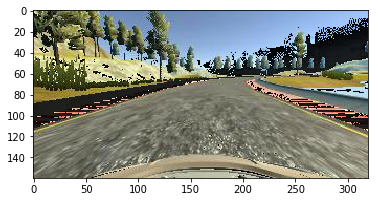

In [211]:
new_image, new_angle = random_modif(image, 0)
plt.imshow(new_image[...,::-1])
plt.show()

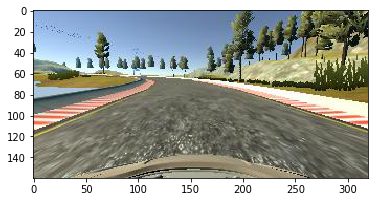

In [169]:
image = cv2.imread(name)
plt.imshow(image[...,::-1])
plt.show()

In [15]:
import cv2
import numpy as np
import sklearn

In [16]:
name = './data/IMG/'+train_samples[0][0].split('/')[-1]

In [17]:
name

'./data/IMG/center_2016_12_01_13_44_31_910.jpg'

In [19]:
import matplotlib.pyplot as plt

In [120]:
image = cv2.imread(name)
new_image = np.minimum(255, np.add(image,np.array([100])))

In [122]:
plt.imshow(new_image)
plt.show()

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

In [21]:
center_image.shape

(160, 320, 3)

In [29]:
import os, csv, cv2, sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from sklearn.utils import shuffle

samples = []

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)


train_samples, validation_samples = train_test_split(samples, test_size=0.2)

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                name = './data/IMG/'+batch_sample[0].split('/')[-1]
                center_image = cv2.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)

In [30]:
train_generator = generator(train_samples, batch_size=1)

In [40]:
next(train_generator)

[array([[[[191, 149, 120],
          [191, 149, 120],
          [191, 149, 120],
          ..., 
          [173, 135, 105],
          [181, 139, 110],
          [190, 143, 115]],
 
         [[191, 149, 120],
          [191, 149, 120],
          [191, 149, 120],
          ..., 
          [170, 131, 103],
          [171, 129, 100],
          [173, 129, 100]],
 
         [[192, 150, 121],
          [192, 150, 121],
          [192, 150, 121],
          ..., 
          [178, 141, 113],
          [180, 141, 113],
          [181, 141, 113]],
 
         ..., 
         [[109, 121, 121],
          [ 88, 100, 100],
          [ 73,  85,  85],
          ..., 
          [ 72,  84,  84],
          [ 82,  94,  94],
          [ 89, 101, 101]],
 
         [[ 80,  92,  92],
          [ 86,  98,  98],
          [ 95, 107, 107],
          ..., 
          [ 74,  86,  86],
          [ 73,  85,  85],
          [ 70,  82,  82]],
 
         [[ 73,  85,  85],
          [ 88, 100, 100],
          [104, 116, 116],

In [46]:
np.random()

TypeError: 'module' object is not callable

In [44]:
import numpy as np

In [48]:
if (np.random.uniform()>0.5):
    

0.15907094150676582

In [56]:
np.random.choice([0,1,2])

1

In [237]:
len(samples)

8037

In [243]:
angles = []
for s in samples[1:]:
    # Random selection of the image
    n = np.random.choice([0,1,2])
    angle = float(s[3]) - (n-1)*0.25
    angles.append(angle)

In [244]:
samples

[['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'],
 ['IMG/center_2016_12_01_13_30_48_287.jpg',
  ' IMG/left_2016_12_01_13_30_48_287.jpg',
  ' IMG/right_2016_12_01_13_30_48_287.jpg',
  ' 0',
  ' 0',
  ' 0',
  ' 22.14829'],
 ['IMG/center_2016_12_01_13_30_48_404.jpg',
  ' IMG/left_2016_12_01_13_30_48_404.jpg',
  ' IMG/right_2016_12_01_13_30_48_404.jpg',
  ' 0',
  ' 0',
  ' 0',
  ' 21.87963'],
 ['IMG/center_2016_12_01_13_31_12_937.jpg',
  ' IMG/left_2016_12_01_13_31_12_937.jpg',
  ' IMG/right_2016_12_01_13_31_12_937.jpg',
  ' 0',
  ' 0',
  ' 0',
  ' 1.453011'],
 ['IMG/center_2016_12_01_13_31_13_037.jpg',
  ' IMG/left_2016_12_01_13_31_13_037.jpg',
  ' IMG/right_2016_12_01_13_31_13_037.jpg',
  ' 0',
  ' 0',
  ' 0',
  ' 1.438419'],
 ['IMG/center_2016_12_01_13_31_13_177.jpg',
  ' IMG/left_2016_12_01_13_31_13_177.jpg',
  ' IMG/right_2016_12_01_13_31_13_177.jpg',
  ' 0',
  ' 0',
  ' 0',
  ' 1.418236'],
 ['IMG/center_2016_12_01_13_31_13_279.jpg',
  ' IMG/left_2016_12_01_13_31